# Code for stabilising the Morris-Lecar (finding the Ihold and Iscale)

## libraries

In [45]:
from brian2 import *
import scipy.io as sio
%matplotlib inline

start_scope()

### creating timed array with current

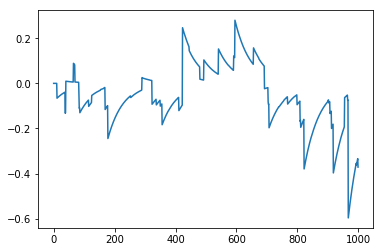

In [46]:
input_I = sio.loadmat('INPUT_THEORY10_new.mat')
INPUT = input_I['THEORY']
TimedA=[]
for x in nditer(INPUT):
    TimedA.append(x)

#check
plot(TimedA[0:1000])

### constants 

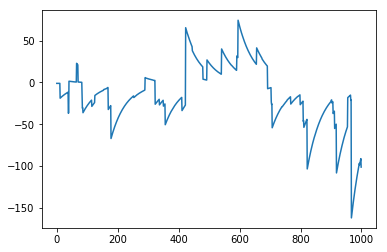

In [47]:
#constants for main model
C=2*ufarad
Bm=-1.2*mV 
phiw=0.15*kHz
gamma_m=18*mV
gamma_w=10*mV
gfast=20*mS  
E_Na=50*mV
gslow=20*mS 
E_K=-100*mV
gleak=2*mS
E_leak=-70*mV

#constants of scaling the input
Ihold=-1.2
Iscale=270

#new stimulus with scaling
for i,x in enumerate(TimedA):
    x=Ihold+Iscale*x
    TimedA[i]=x
    
#checking to see if values were added right
plot(TimedA[0:1000])

#making the stimulus
stimulus=TimedArray(TimedA*uamp,dt=0.1*ms)

#MAIN CONSTANT OF MODEL
Bw=-13*mV

### model equations

In [48]:
eqs ='''
dV/dt=1/C*(stimulus(t)-gfast*hinf*(V-E_Na)-gslow*w*(V-E_K)-gleak*(V-E_leak)): volt
hinf = 0.5*(1+tanh((V-Bm)/gamma_m)) : 1
dw/dt= phiw*lambda_w*(winf-w) : 1
winf = 0.5*(1+tanh((V-Bw)/gamma_w)) : 1
lambda_w = cosh((V-Bw)/(2*gamma_w)) : 1
'''

### neuron statement

In [49]:
G=NeuronGroup(1,eqs,dt=0.1*ms,method='euler',events={'custom_event1': 'w>1','custom_event2': 'w<0'})
initial_values = {'V': -70*mV, 'w': 0.}
G.set_states(initial_values)
G.run_on_event('custom_event1','w=1')
G.run_on_event('custom_event2','w=0')

Resetter(clock=Clock(dt=100. * usecond, name='neurongroup_1_clock_2'), when=after_resets, order=0, name='neurongroup_1_resetter_3')

### monitor statement

In [50]:
M = StateMonitor(G, 'V', record=True,dt=0.1*ms)
N = StateMonitor(G,'w',record=True,dt=0.1*ms)

## Running the simulation

In [51]:
run(300000*ms,report='stdout',report_period=60*second)

Starting simulation at t=0. s for a duration of 300. s
96.31360000000001 (32%) simulated in 1m 0s, estimated 2m 7s remaining.
187.3402 (62%) simulated in 2m 0s, estimated 1m 12s remaining.
280.1189 (93%) simulated in 3m 0s, estimated 13s remaining.
300.0 (100%) simulated in 3m 13s


### calculate number of spikes

In [52]:
count=0
const1=0
for j in range(300):
    listt=M.V[0][j*10000:j*10000+10000]
    for i,x in enumerate(listt):
        #print(i)
        if i==0:
            if const1<listt[i] and listt[i]>listt[i+1] and listt[i]>10*mV:
                count+=1        
        if (i>=1) and (i<=9998):
            if listt[i-1]<listt[i] and listt[i+1]<listt[i] and listt[i]>=10*mV:
                count+=1
        if i==9999:
            if M.V[0][j*10000+1]<listt[i] and listt[i]>listt[i-1] and listt[i]>10*mV:
                count+=1
    const1=listt[9999]
print('The firing rate is :',count/300)

The firing rate is : 12.436666666666667


### plot

Text(0,0.5,'w')

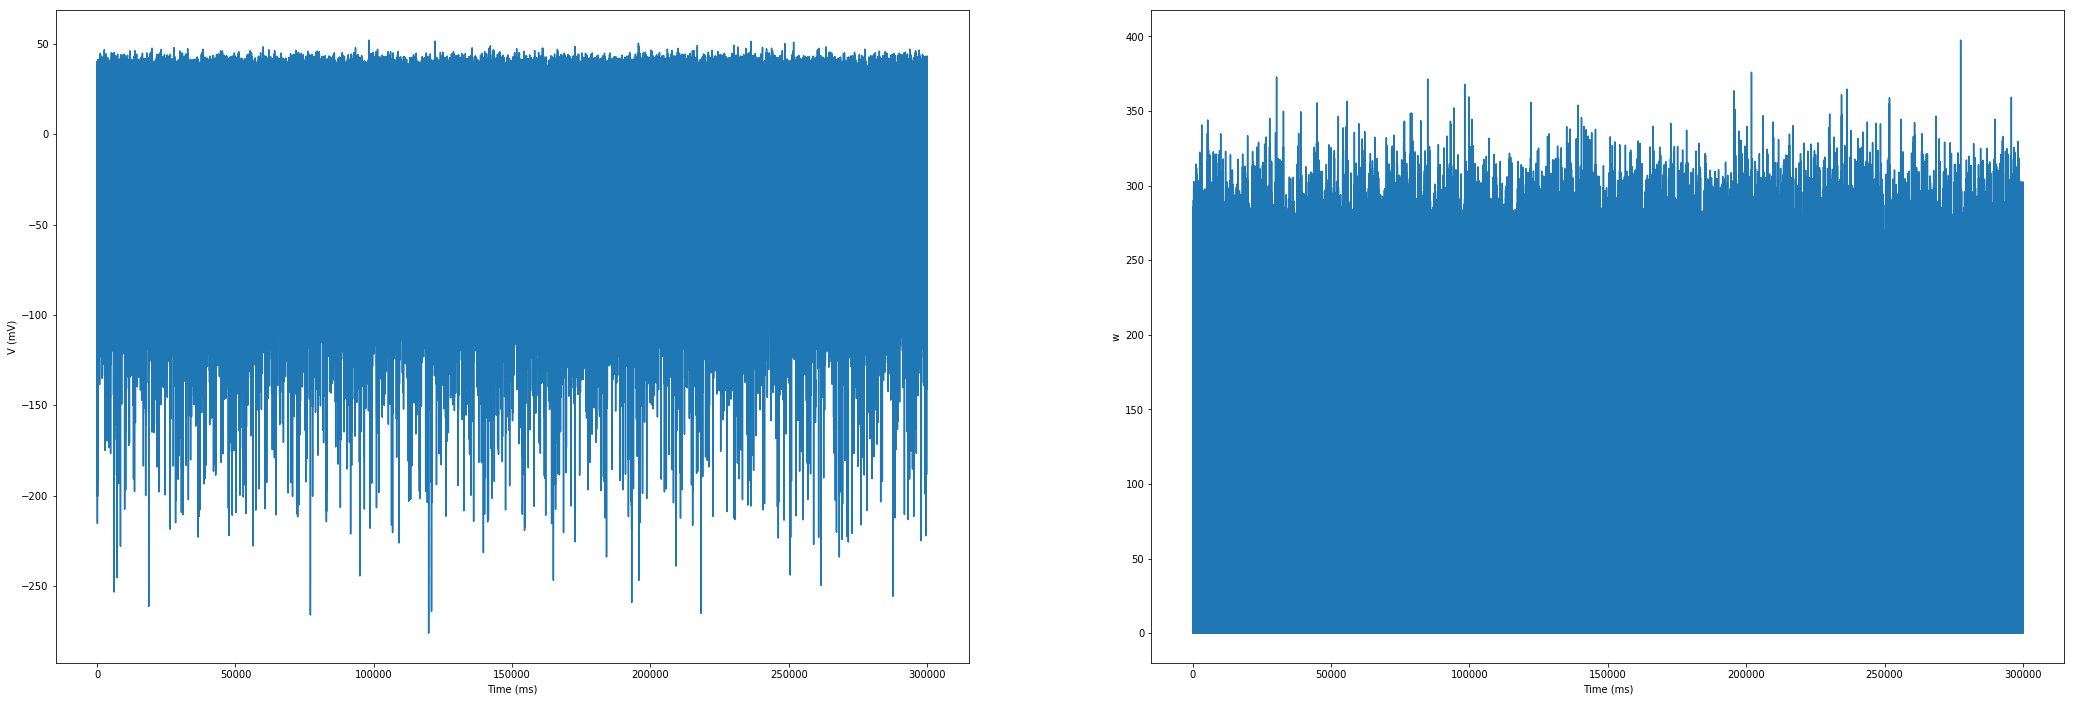

In [103]:
#plotting
figure(figsize=(36,12))
subplot(121)
plot(M.t/ms, M.V[0]/mV)
xlabel('Time (ms)')
ylabel('V (mV)')
subplot(122)
plot(M.t/ms, N.w[0]/mV)
xlabel('Time (ms)')
ylabel('w')

# problems

changing bw doesnt change the neuron's behavior

### interesting  behavior

Ihold=36.74 for bw=0mV <br>
Ihold=42.089364 for bw=-13mV <br>
Ihold=78.1000 for bw=-21mV <br>


Ihold=500 bw=-21mV gslow=32

gslow, bm decreasing, gfast increasing -> increases class 1

# for stable Iscale
Iscale=352
Ihold=-1.1

# for stable rate
### 1st run
Iscale=323 for b=0 I=-1.1<br>
Iscale=330 for b=-4 I=1.1<br>
Iscale=340 for b=-8 I=-1.1<br>
Iscale=361 for b=-13 I=-1.2<br>
Iscale=389 for b=-17 I=-1.3<br>
Iscale=443 for b=-21 I=-1.3<br>
### 2nd run seed = 2000
Iscale=313 for bw=0 <br>
Iscale=320 for bw=4 <br>
Iscale=330 for bw=8 <br>
### 3rd run seed = 3000
Iscale=316 for bw=0 <br>
Iscale=323 for bw=4 <br>
Iscale=332 for bw=8 <br>
Iscale=355 for bw=13 <br>
Iscale=385 for bw=17 <br>
Iscale=439 for bw=21 <br>
### 4th run seed =4k
Iscale=306 for bw=0 <br>
Iscale=311 for bw=4 <br>
Iscale=323 for bw=8 <br>
Iscale=347 for bw=13 <br>
Iscale=379 for bw=17 <br>
Iscale=430 for bw=21 <br>
### 5th run seed=5k
Iscale=302 for bw=0 <br>
Iscale=308 for bw=4 <br>
Iscale=317 for bw=8 <br>
Iscale=338 for b2=13 <br>
Iscale=365 for bw=17 <br>
Iscale=419 for bw=21 <br>
### 6th run seed=6k
Iscale=325 for bw=0 <br>
Iscale=332 for bw=4 <br>
Iscale=342 for bw=8 <br>
Iscale=362 for bw=13 <br>
Iscale=392 for bw=17 <br>
Iscale=447 for bw=21 <br>
### 7th run seed =7k
Iscale=313 for bw=0 <br>
Iscale=319 for bw=4 <br>
Iscale=329 for bw=8 <br>
Iscale=351 for bw=13 <br>
Iscale=378 for bw=17 <br>
Iscale=432 for bw=21 <br>
### 8th run
Iscale=308 for bw=0 <br>
Iscale=313 for bw=4 <br>
Iscale=323 for bw-8 <br>
Iscale=345 for bw=13 <br>
Iscale=374 for bw=17 <br>
Iscale=429 for bw=21 <br>
### 9th run
Iscale=300 for bw=0 <br>
Iscale=306 for bw=4 <br>
Iscale=316 for bw=8 <br>
Iscale=338 for bw=13 <br>
Iscale=366 for bw=17 <br>
Iscale=419 for bw=21 <br>
### 10th run 
Iscale=315 for bw=0 <br>
Iscale=321 for bw=4 <br>
Iscale=331 for bw=8 <br>
Iscale=352 for bw=13 <br>
Iscale=380 for bw=17 <br>
Iscale=431 for bw=21 <br>